<a href="https://colab.research.google.com/github/gmb408/OSSP-KBO-prediction/blob/version-0.1/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [45]:
# matplotlib 한글 출력 가능하도록 만들기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [46]:
# 데이터 분석 모듈
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime

In [47]:
result = pd.read_csv("/content/statiz_pre.csv", index_col=0)

In [48]:
print("&lt;전체 column 타입확인&gt;\n\n",result.dtypes.value_counts())
print()
print("&lt;object type columns&gt;\n\n",result.columns[result.dtypes=='object'])

&lt;전체 column 타입확인&gt;

 float64    26
object      4
int64       3
dtype: int64

&lt;object type columns&gt;

 Index(['이름', '생일', '팀', '포지션'], dtype='object')


In [49]:
# Find correlations with the target and sort
correlations = result.corr()['OPS'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(11))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 득점      0.595496
홈런      0.648345
타점      0.654235
루타      0.661237
WAR+    0.717280
출루      0.880695
wRC+    0.891112
타율      0.914300
wOBA    0.935634
장타      0.973038
OPS     1.000000
Name: OPS, dtype: float64

Most Negative Correlations:
 ID   -0.277118
희타   -0.236876
나이    0.099814
시즌    0.133493
도실    0.137380
도루    0.157725
3타    0.191798
병살    0.344858
G     0.347694
사구    0.353286
Name: OPS, dtype: float64


Text(0.5, 1.0, 'Top 10 correlations with OPS')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_

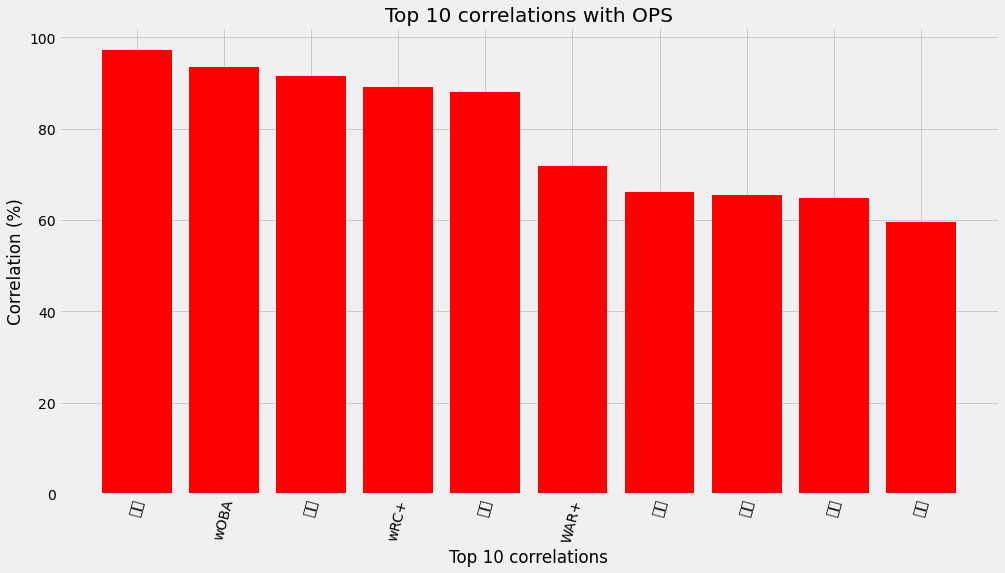

In [50]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))

plt.bar(correlations.tail(11)[:-1].index.astype(str)[::-1], 100*correlations.tail(11)[:-1][::-1],color='r')

# Plot labeling
plt.xticks(rotation=75) ; plt.xlabel('Top 10 correlations'); plt.ylabel('Correlation (%)');
plt.title('Top 10 correlations with OPS')

Text(0.5, 1.0, 'Low 8 correlations with OPS')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51596 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_

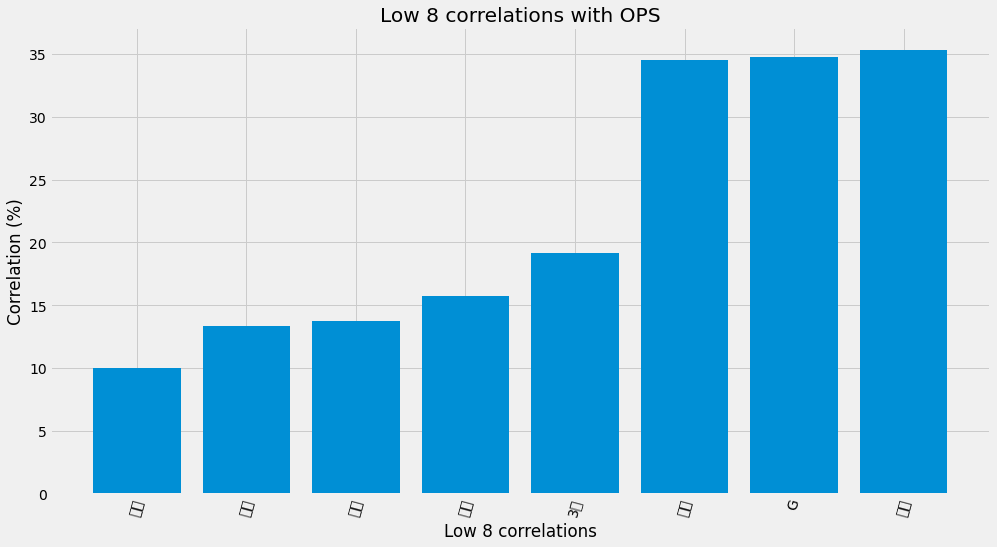

In [36]:
plt.figure(figsize=(15,8))

plt.bar(correlations.head(10)[2:].index.astype(str), 100*correlations.head(10)[2:])

# Plot labeling
plt.xticks(rotation=75) ; plt.xlabel('Low 8 correlations'); plt.ylabel('Correlation (%)')
plt.title('Low 8 correlations with OPS')

Top 5. High correlation with 'OPS' Pair Plot


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_

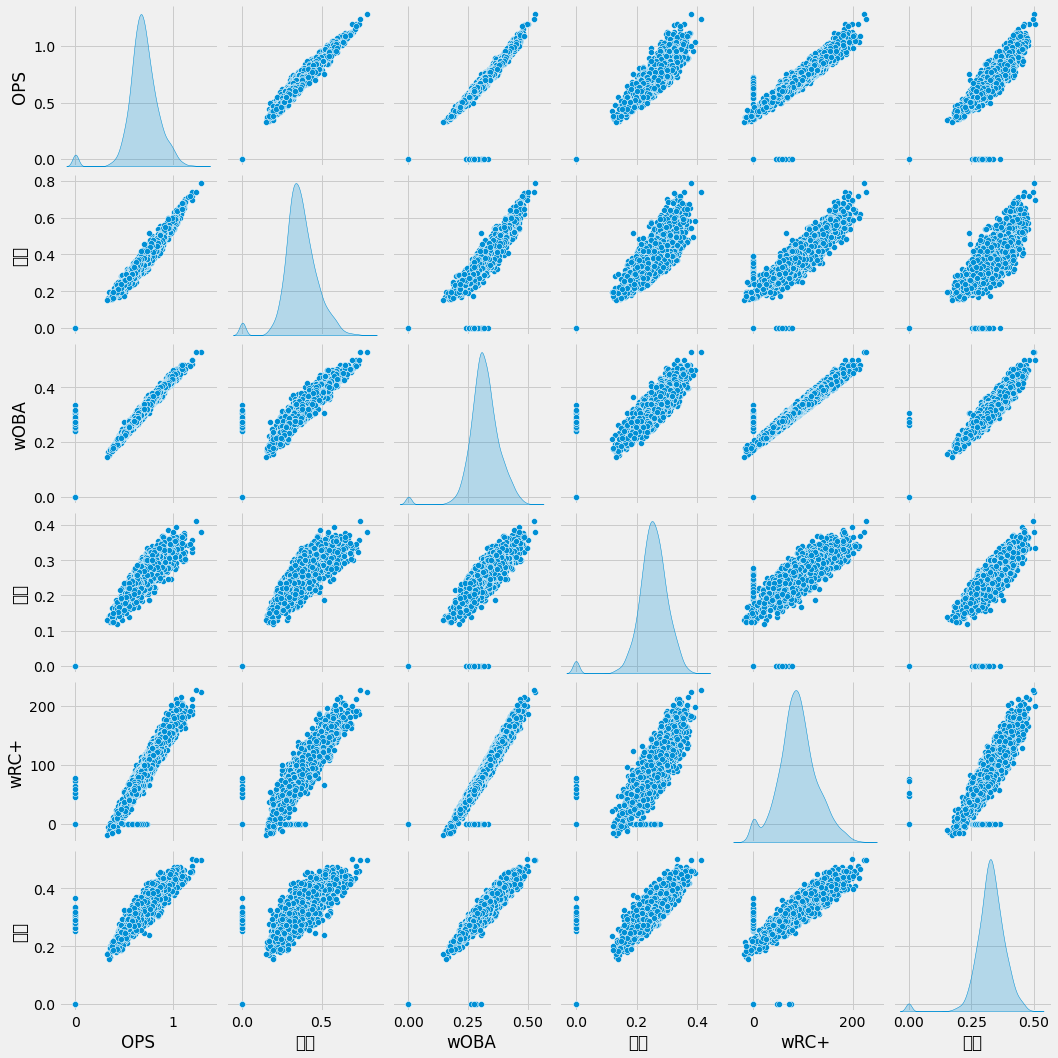

In [37]:
#Top 5. High correlation with 'OPS' Pair Plot
print("Top 5. High correlation with 'OPS' Pair Plot")
high_corr = result.loc[:,list(correlations.tail(6)[::-1].index)]
sns.pairplot(high_corr,diag_kind='kde')
plt.show()

Top5. Low correlation with 'OPS' Pair Plot


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 55148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_

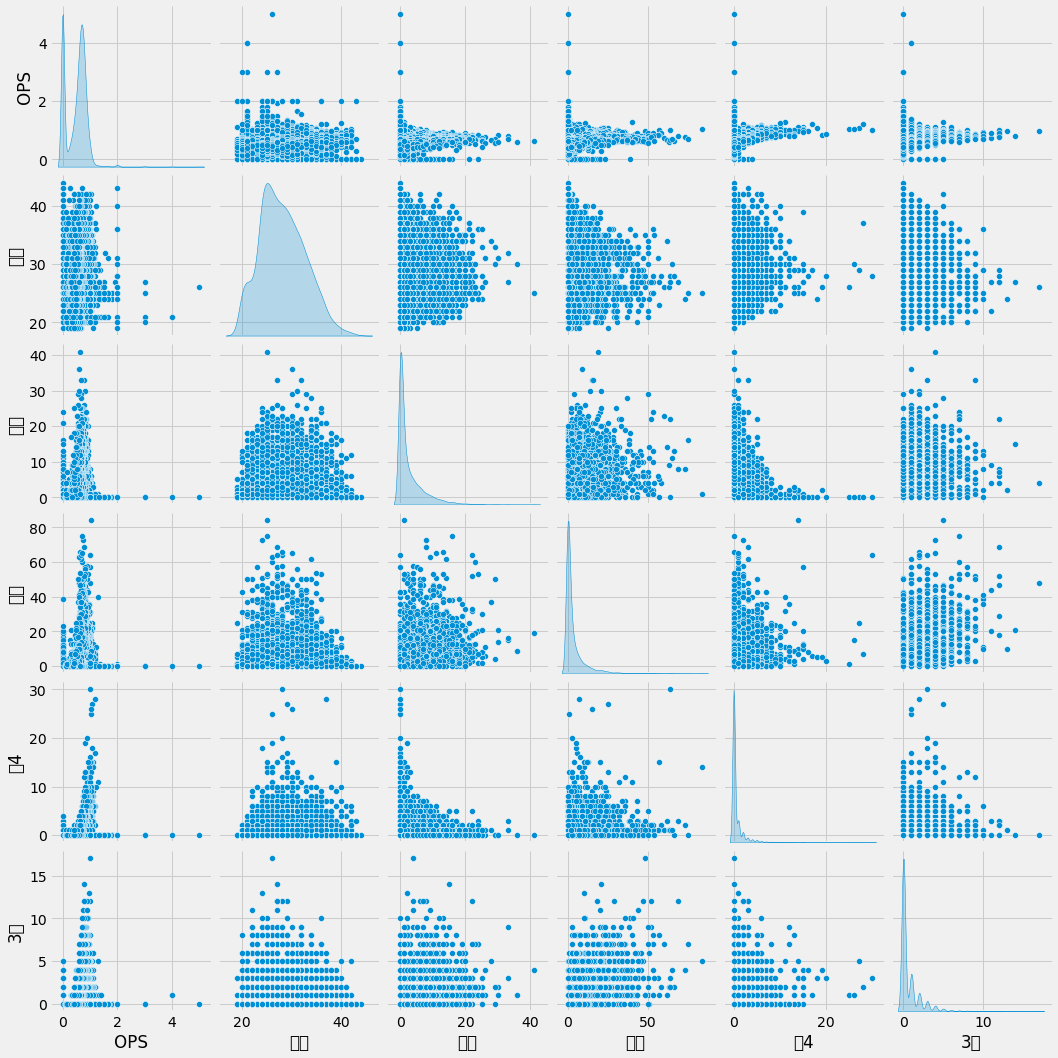

In [ ]:
# Top5. Low correlation with 'OPS' Pair Plot
print("Top5. Low correlation with 'OPS' Pair Plot")
low_corr = result.loc[:,['OPS']+list(correlations.head(7)[2:].index)]
sns.pairplot(low_corr,diag_kind='kde')
plt.show()

In [51]:
# dtype이 object인 것과 OPS 추출
result_obj=result.loc[:,list(result.columns[result.dtypes=='object'])+['OPS']]

Text(0.5, 1.0, '포지션별 OPS violinplot')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_te

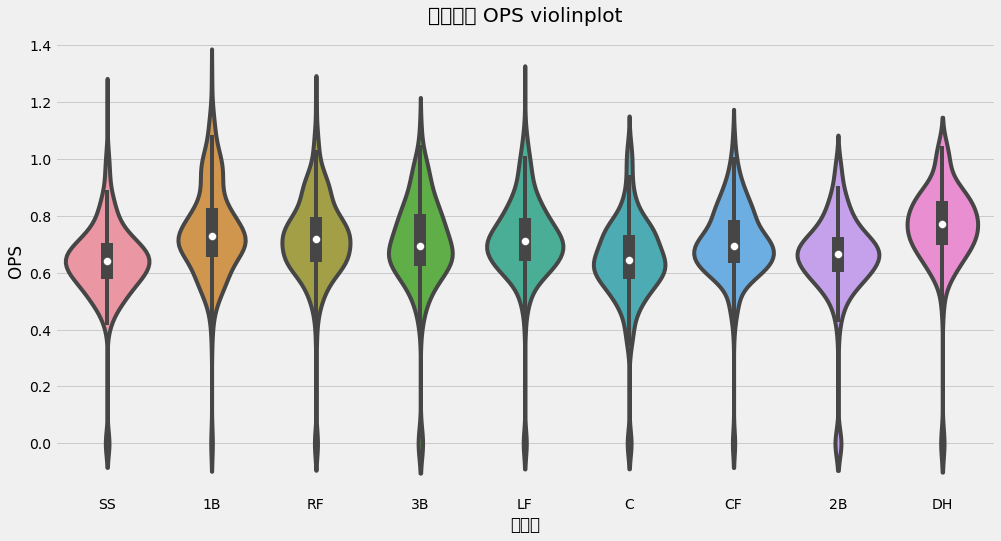

In [53]:
# 포지션별 OPS violinplot 그려보기
plt.figure(figsize=(15,8))
sns.violinplot(x='포지션',y='OPS',data=result_obj)
plt.title("포지션별 OPS violinplot")